<a href="https://colab.research.google.com/github/Natali17/contests/blob/main/%D0%91%D1%8B%D1%81%D1%82%D1%80%D1%8B%D0%B5_%D1%81%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://cs.mipt.ru/algo_fefm/lessons/lab10.html

# **Сортировка слиянием**
## Сортирующее действие
Предположим следующую задачу: имеется два отсортированных по возрастанию массива `A` и `B`, необходимо составить из них массив `C`, который также отсортирован по возрастанию.

Для решения этой задачи можно воспользоваться слиянием.

Размер массива `C` известен - это сумма размеров массивов `A` и `B`. Завёдем три индекса:

* `a` будет указывать на позицию в массиве `A`
* `b` - на позицию в массиве `B`
* `c` - на позицию в массиве `C`

В начале каждый из индексов указывает на начало своего массива.

Будем класть в `C[c]` элемент, нестрого меньший (для устойчивости сортировки) из `A[a]` и `B[b]`. Если в результате этой операции мы взяли элемент из `A`, то передвинем позицию `a` вправо на единицу, аналогично поступаем, если взяли элемент из `B`. Также, в любом случае, передвинем уровень заполнения `c`.

Такое заполнение закончится тогда, когда мы выйдем за пределы одно из сливаемых массивов.

Для завершения слияния необходимо дополнить `C` нетронутыми элементами, которые будут находится в одном из массивов, так как второй мы израсходовали.

## Сортировка
Итак, мы знаем, как получить отсортированный массив из двух отсортированных.

Сортировка слиянием заключается в том, чтобы
* разбить исходный массив пополам
* рекуррентно отсортировать левую часть
* рекуррентно отсортировать правую часть
* осуществить слияние отсортированных частей в исходный массив

Крайний случай - это массив длины `0` или `1`, поскольку он уже отсортирован.

# **Сортировка Тони Хоара**
* Сортирующее действие
Сортирующим действием сортировки Тони Хоара является разбиение массива по барьеру.

В результате его применения элементы в исходном массиве должны быть упорядочены следующим образом:

* в начале расположены элементы, меньшие барьера (группа 1)
* затем идут элементы, равные барьеру (группа 2)
* а после них следуют элементы, большие барьера (группа 3)

## Сортировка
Сама же сортировка заключается в том, чтобы разбить массив по одному из его элементов (например, первому или случайному) на три группы, указанные выше. Затем рекурсивно отсортировать первую и третью группы. После этого соединить отсортированные группы: сначала первая, затем вторая (равные барьеру) и, наконец, третья.

Крайним случаем являются массивы длиной 0 и 1.

# A  - Сортировка слиянием
В этой задаче требуется написать сортировку слиянием inplace.

Для этого напишите функцию merge_sort(A, depth=1, part='left') , осуществляющую сортировку слиянием, и логирующую состояние вызова.

Ниже показан шаблон функции, используйте его, чтобы лог-сообщения о вызовах соответствовали тем, что в тестах.

Внесённый вами код должен находиться между вызовами print .

Также внимательно прочтите примечания в шаблоне.

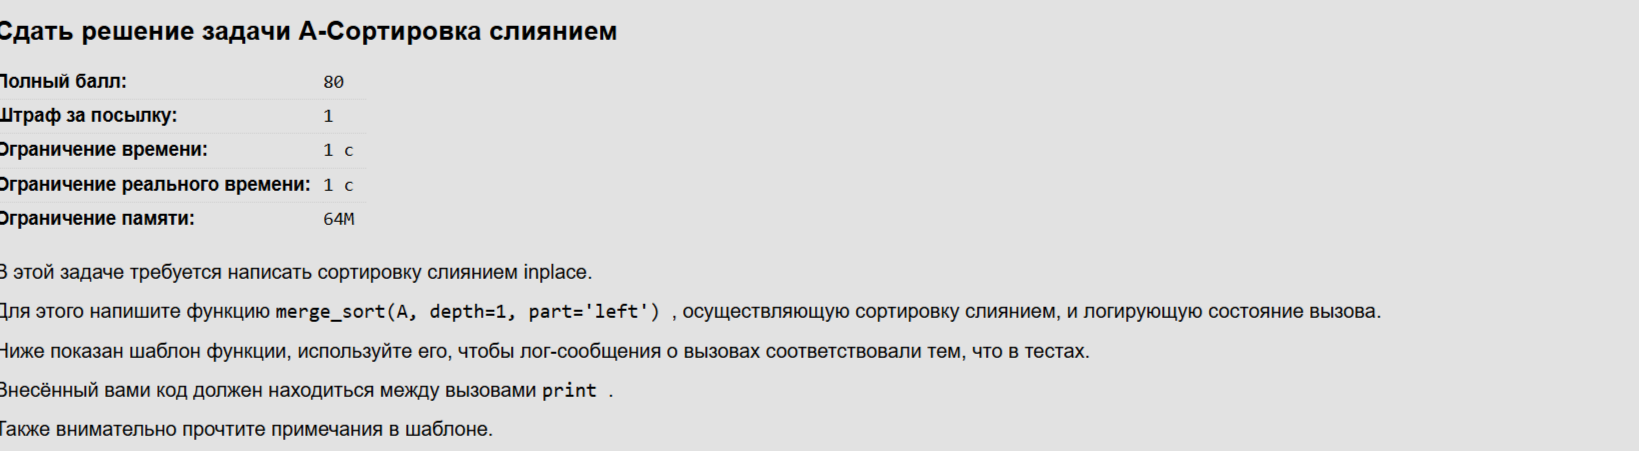

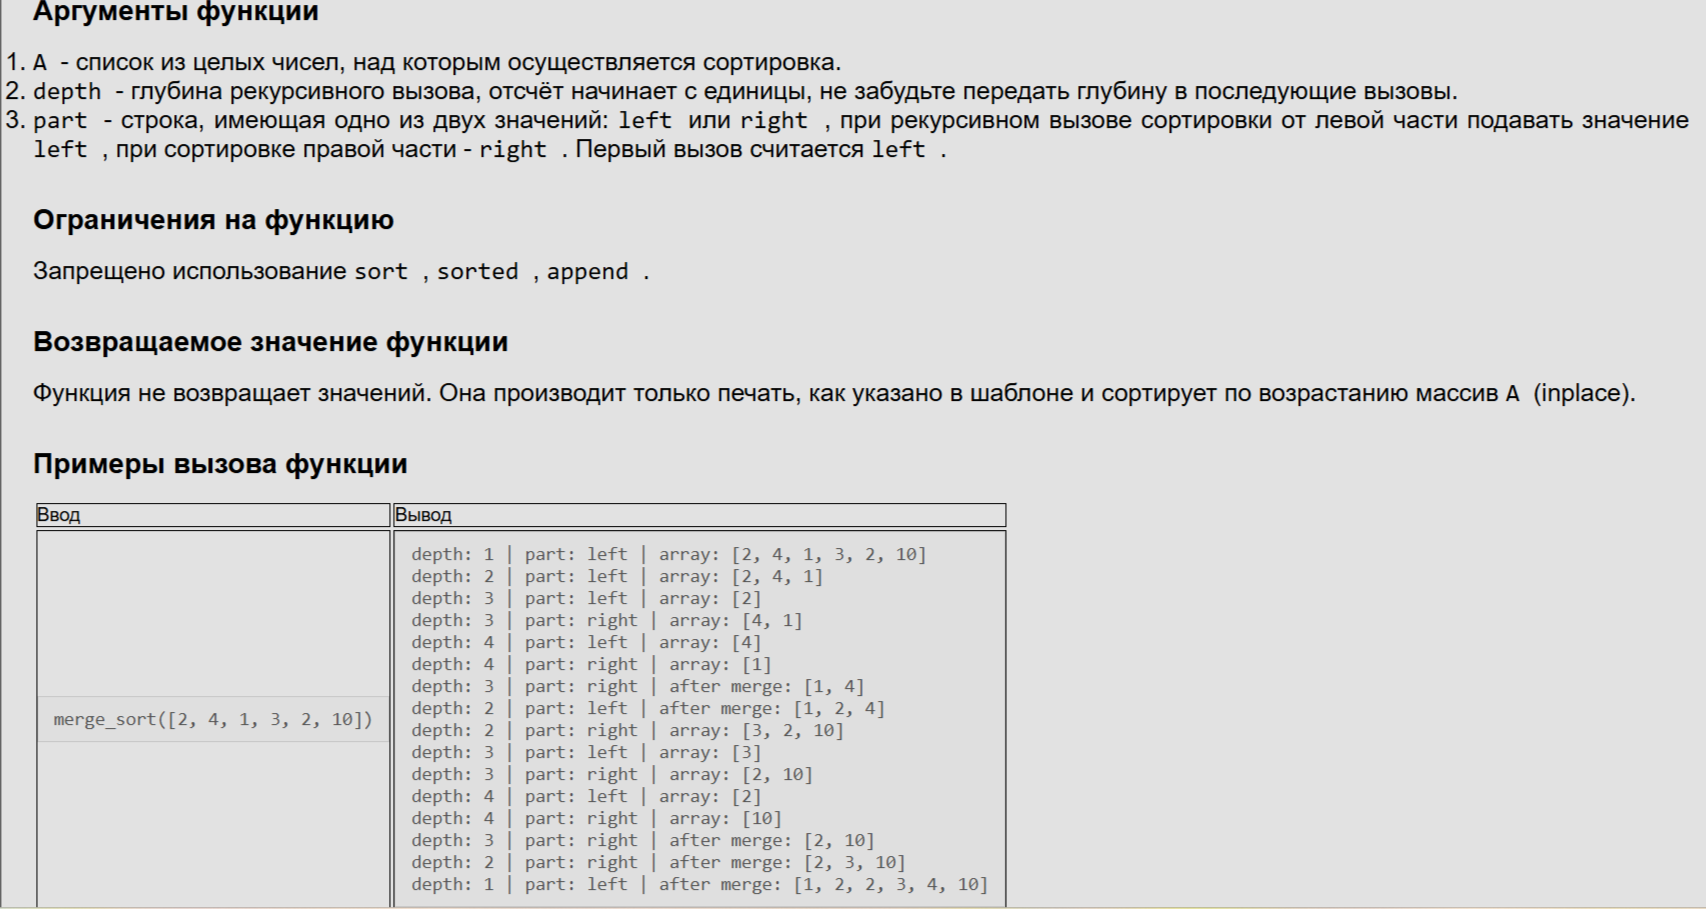

In [ ]:
def merge_sort(A, depth=1, part='left'):
    print('depth:', depth, '|', 'part:', part, '|', 'array:', A)  #  состояние переменных при вызове

    #  ваша реализация сортировки
    if len(A) <= 1:
        return A
    mid = len(A) // 2
    a1 = A[:mid]
    a2 = A[mid:]

    a1 = merge_sort(a1, depth + 1, part='left')
    a2 = merge_sort(a2, depth + 1, part='right')

    merged = [0] * (len(a1) + len(a2))
    i = j = k = 0
    while i < len(a1) and j < len(a2):
      if a1[i] < a2[j]:
        merged[k]= a1[i]
        i += 1
      else:
        merged[k] = a2[j]
        j += 1
      k += 1

    while i < len(a1):
        merged[k] = a1[i]
        i += 1
        k += 1
    while j < len(a2):
        merged[k] = a2[j]
        j += 1
        k += 1

    A[:] = merged

    print('depth:', depth, '|', 'part:', part, '|', 'after merge:', A)
    return(A)

B = list(map(int, input().split()))
merge_sort(B)
pass

2 4 1 10
depth: 1 | part: left | array: [2, 4, 1, 10]
depth: 2 | part: left | array: [2, 4]
depth: 3 | part: left | array: [2]
depth: 3 | part: right | array: [4]
depth: 2 | part: left | after merge: [2, 4]
depth: 2 | part: right | array: [1, 10]
depth: 3 | part: left | array: [1]
depth: 3 | part: right | array: [10]
depth: 2 | part: right | after merge: [1, 10]
depth: 1 | part: left | after merge: [1, 2, 4, 10]


# B - Сортирующее действие - разбиение массива по барьеру
Разбиение массива по барьеру является сортирующим действием в сортировке Тони Хоара.

В результате этого действия исходный массив A преобразуется так, что сначала в нём идут элементы, строго меньшие барьера barrier , затем равные барьеру элементы, и, наконец, элементы, строго большие барьера.

При этом относительный порядок элементов в каждой из трёх групп сохраняется.

Вам необходимо написать функцию split_barrier(A, barrier) , осуществляющую описанное выше сортировочное действие над массивов целых чисел A по целочисленному барьеру barrier .

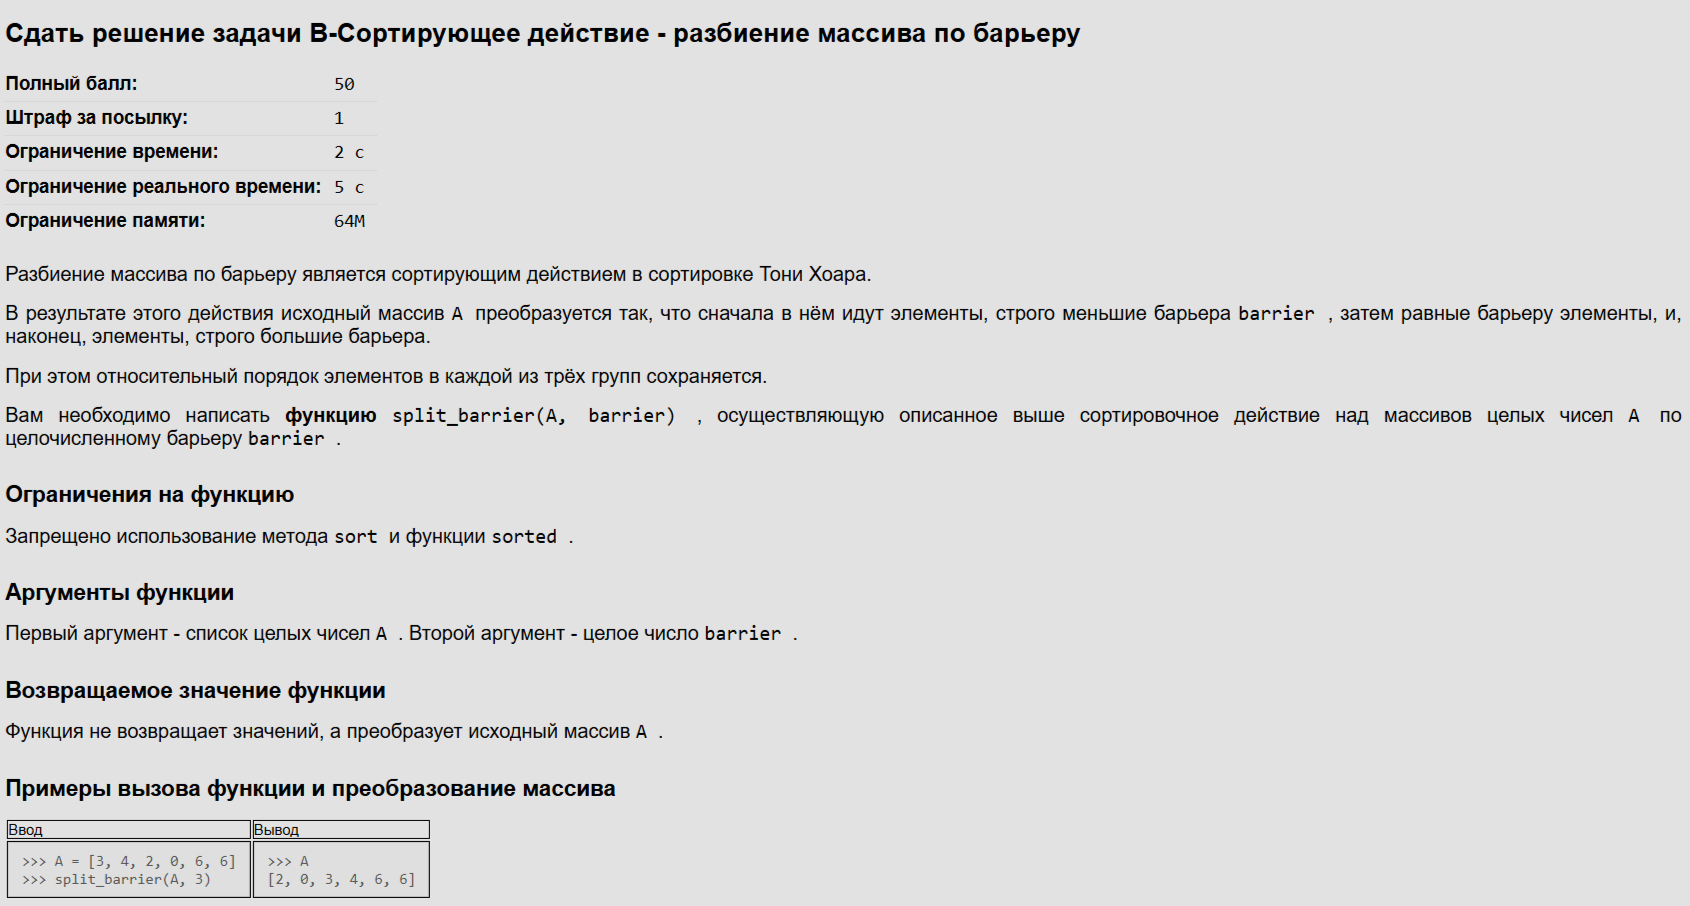

In [ ]:
def split_barrier(A, barrier):
  left = []
  medium = []
  right = []
  if len(A) <= 1:
    return A
  for i in range(len(A)):
    if A[i] < barrier:
      left.append(A[i])
    elif A[i] == barrier:
      medium.append(A[i])
    else:
      right.append(A[i])
  #if left:
  #  left = split_barrier(left, left[0])
  #if right:
  #  right = split_barrier(right, right[0])
  result = left + medium + right
  A[:] = result
  return(A)
B = list(map(int, input().split()))
split_barrier(B, 3)

3 4 2 0 6 6


[2, 0, 3, 4, 6, 6]

# C - Быстрые сортировки - сортировка Тони Хоара
Сортировка Тони Хоара заключается в следующем: - разбиение массива по барьеру - сортировка элементов, меньших барьера (группа 1) - рекуррентный вызов - сортировка элементов, больших барьера (группа 3) - рекуррентный вызов - пересборка исходного массива "склеиванием" элементов группы 1, затем элементов, равных барьеру (группа 2) и элементов группы 3

В этой задаче вам необходимо реализовать сортировку Тони Хоара, в которой в качестве барьера используется элемент массива на позиции 0.

Для написания функции воспользуетсь шаблоном, приведённом ниже. Ваш код должен находиться между вызовами функции print . Отправлять на проверку нужно всю функцию hoar_sort .

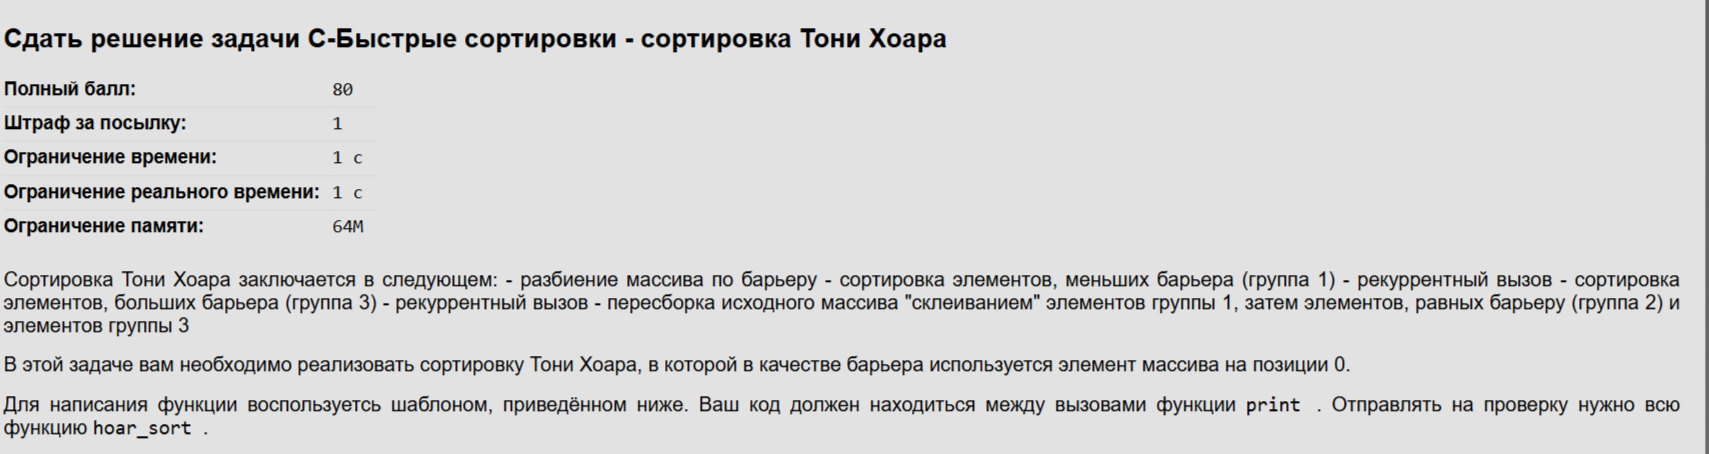

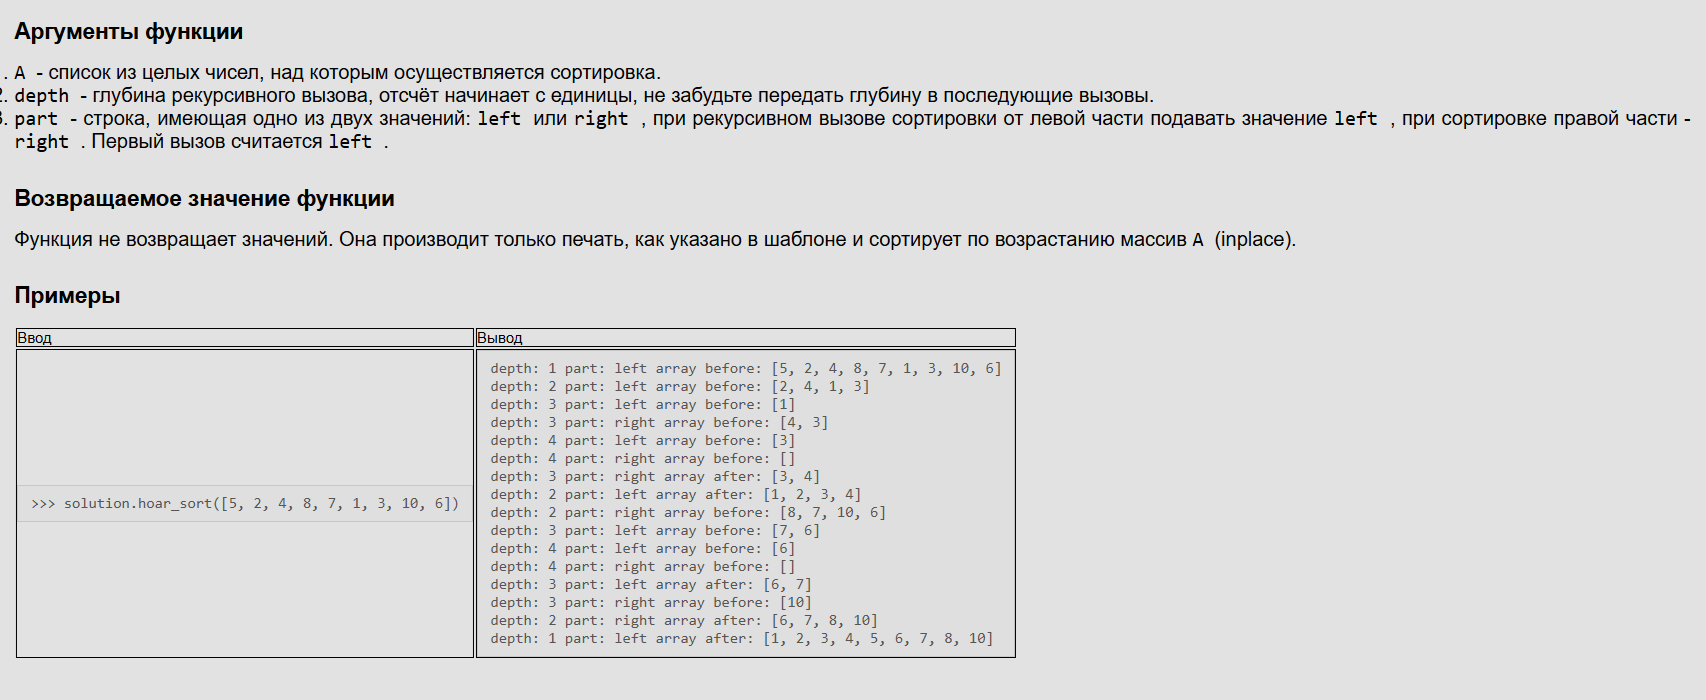

In [ ]:
def hoar_sort(A, depth=1, part='left'):
  print('depth:', depth, 'part:', part, 'array before:', A)
  left = []
  medium = []
  right = []
  if len(A) <= 1:
    return A
  for i in range(len(A)):
    if A[i] < A[0]:
      left.append(A[i])
    elif A[i] == A[0]:
      medium.append(A[i])
    else:
      right.append(A[i])

  left = hoar_sort(left, depth+1, part='left')
  right = hoar_sort(right, depth+1, part='right')

  result = left + medium + right
  A[:] = result
  print('depth:', depth, 'part:', part, 'array after:', A)
  return(A)

B = list(map(int, input().split()))
hoar_sort(B)




    #  ваша реализация сортировки

  #  print('depth:', depth, 'part:', part, 'array after:', A) 5 2 4 8 7 1 3 10 6

5 2 4 8 7 1 3 10 6
depth: 1 part: left array before: [5, 2, 4, 8, 7, 1, 3, 10, 6]
depth: 2 part: left array before: [2, 4, 1, 3]
depth: 3 part: left array before: [1]
depth: 3 part: right array before: [4, 3]
depth: 4 part: left array before: [3]
depth: 4 part: right array before: []
depth: 3 part: right array after: [3, 4]
depth: 2 part: left array after: [1, 2, 3, 4]
depth: 2 part: right array before: [8, 7, 10, 6]
depth: 3 part: left array before: [7, 6]
depth: 4 part: left array before: [6]
depth: 4 part: right array before: []
depth: 3 part: left array after: [6, 7]
depth: 3 part: right array before: [10]
depth: 2 part: right array after: [6, 7, 8, 10]
depth: 1 part: left array after: [1, 2, 3, 4, 5, 6, 7, 8, 10]


[1, 2, 3, 4, 5, 6, 7, 8, 10]

# D - Сортировка выбором — рекурсивный вариант
Написать программу, осуществляющую сортировку выбором введённых целых чисел по возрастанию c использованием рекурсии. Внимание! Сначала необходимо считать все введённые числа в один список

Использование конструкций sort и sorted запрещено!

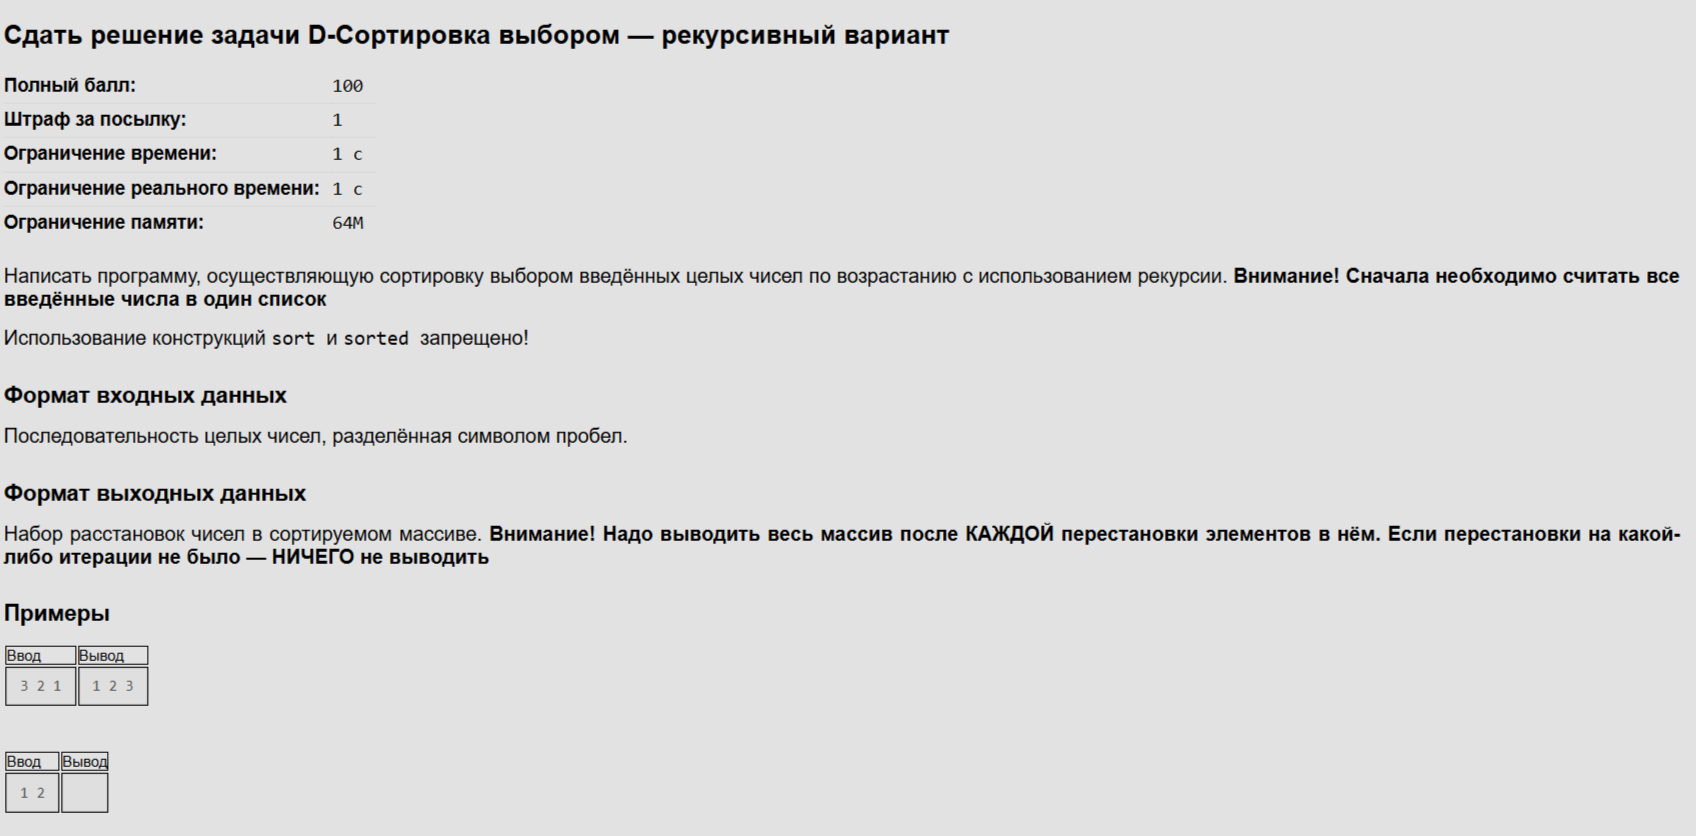

In [ ]:
arr = list(map(int, input().split()))
def sort_with_rec(A):
  if len(A) <= 1:
    return A

  min_index = 0
  for j in range(1, len(A)):
    if A[j] < A[min_index]:
      min_index = j
  A[0], A[min_index] = A[min_index], A[0]

  return [A[0]] + sort_with_rec(A[1:])
sort_with_rec(arr)


3 2 1


[1, 2, 3]

In [ ]:
arr = list(map(int, input().split()))
def sort_with_rec(A, start_index = 0):
  if start_index >= len(A) - 1:
    return A

  min_index = start_index
  for j in range(start_index+1, len(A)):
    if A[j] < A[min_index]:
      min_index = j
  if min_index != start_index:
    A[start_index], A[min_index] = A[min_index], A[start_index]
    print(*A)
  return sort_with_rec(A, start_index+1)



sort_with_rec(arr)

-246 -35 339 533 983 -434
-434 -35 339 533 983 -246
-434 -246 339 533 983 -35
-434 -246 -35 533 983 339
-434 -246 -35 339 983 533
-434 -246 -35 339 533 983


[-434, -246, -35, 339, 533, 983]

# E - Сортировка положительных и отрицательных чисел в разные стороны с сохранением знаковых позиций
Отсортировать массив целых чисел, содержащий числа разных знаков. Отрицательные числа должны быть отсортированы по убыванию, а неотрицательные - по возрастанию. При сортировке отрицательные числа не должны попадать в те позиции, где стояли положительные и наоборот.

Для решения задачи использовать модифицированный метод пузырька, при котором неотрицательные числа переставляются с неотрицательными, а отрицательные с отрицательными.

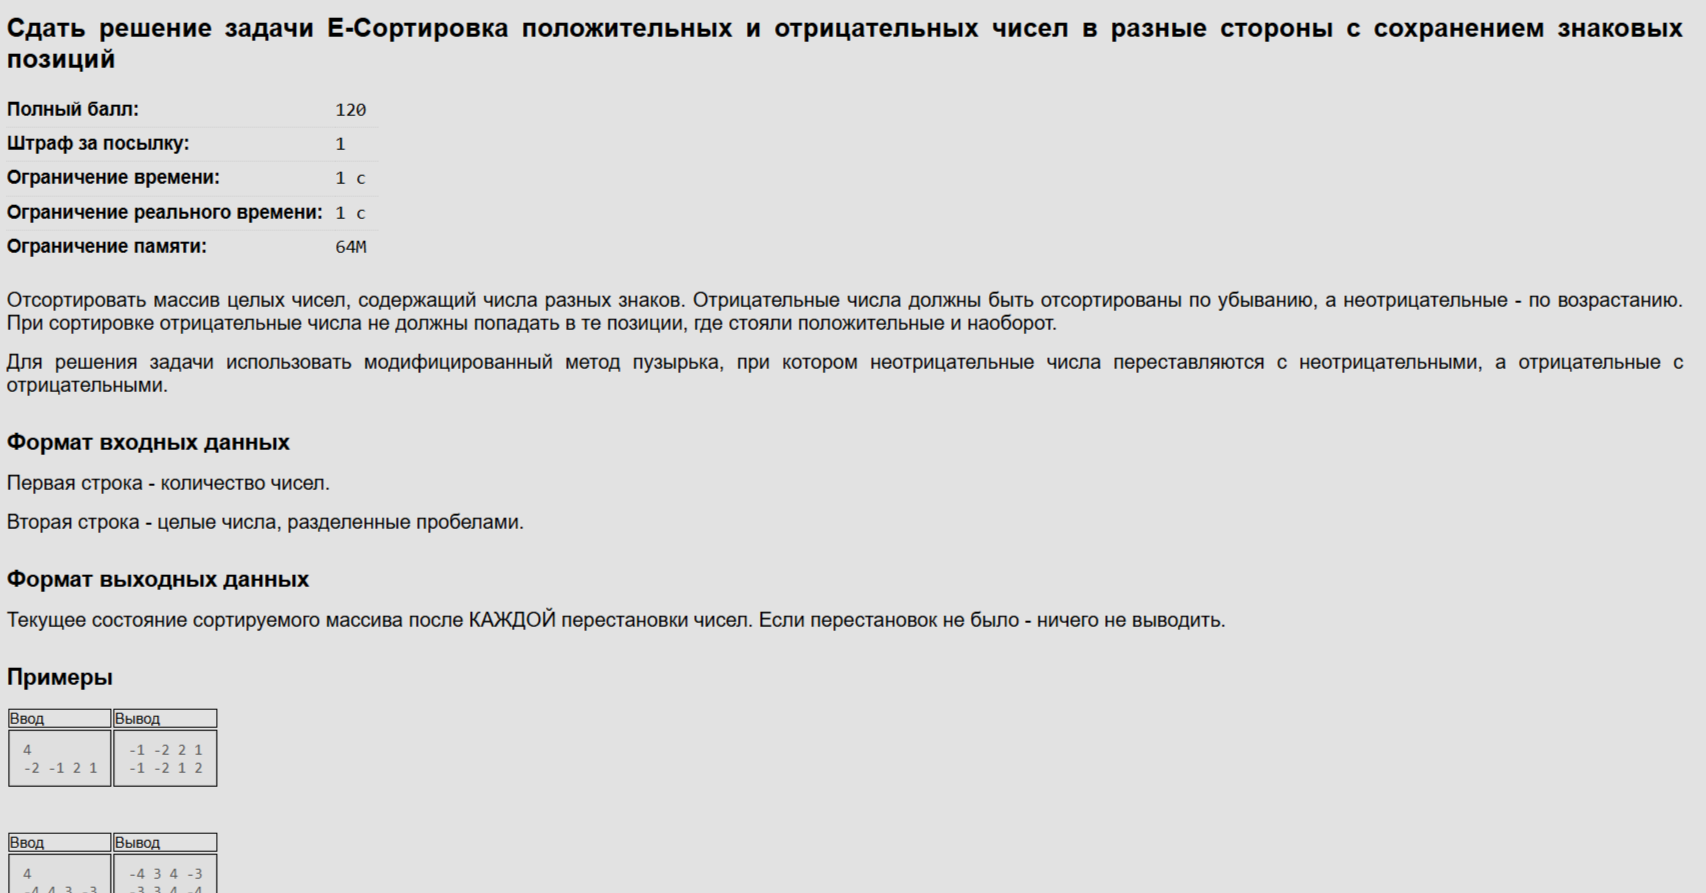

In [6]:
# Похоже на сортировку выбором
n = int(input())
arr = list(map(int, input().split()))
for i in range(len(arr)):
  for j in range(i+1, len(arr)):
    flag = False
    if (arr[i] > 0 and arr[j] > 0) and arr[i] > arr[j]:
      arr[i], arr[j] = arr[j], arr[i]
      flag = True
    if (arr[i] <= 0 and arr[j] <= 0) and arr[i] < arr[j]:
      arr[i], arr[j] = arr[j], arr[i]
      flag = True
    if flag == True:
      print(*arr)


4
-4 4 3 -3
-3 4 3 -4
-3 3 4 -4


In [9]:
n = int(input())
arr = list(map(int, input().split()))
for i in range(n):
  for j in range(n - 1):
    target_idx = -1
    for k in range(j + 1, n):
      if (arr[j] >= 0 and arr[k] >= 0) or (arr[j] < 0 and arr[k] < 0):
        target_idx = k
        break
    if target_idx != -1:
      flag = False
      if arr[j] >= 0 and arr[j] > arr[target_idx]:
        arr[j], arr[k] = arr[k], arr[j]
        flag = True
      elif arr[j] < 0 and arr[j] < arr[target_idx]:
          arr[j], arr[k] = arr[k], arr[j]
          flag = True
      if flag == True:
        print(*arr)


10
-4 -79 -17 -12 94 65 -56 -79 -7 39
-4 -17 -79 -12 94 65 -56 -79 -7 39
-4 -12 -79 -17 94 65 -56 -79 -7 39
-4 -7 -79 -17 94 65 -56 -79 -12 39
-4 -7 -17 -79 94 65 -56 -79 -12 39
-4 -7 -12 -79 94 65 -56 -79 -17 39
-4 -7 -12 -56 94 65 -79 -79 -17 39
-4 -7 -12 -17 94 65 -79 -79 -56 39
-4 -7 -12 -17 65 94 -79 -79 -56 39
-4 -7 -12 -17 39 94 -79 -79 -56 65
-4 -7 -12 -17 39 65 -79 -79 -56 94
-4 -7 -12 -17 39 65 -56 -79 -79 94


In [14]:
n = int(input())
arr = list(map(int, input().split()))
for i in range(n):
  for j in range(1, n):
    target_idx = -1
    for k in range(j-1, -1, -1):
      if (arr[j] >= 0 and arr[k] >= 0) or (arr[j] < 0 and arr[k] < 0):
        target_idx = k
        break

    if target_idx != -1:
      flag = False
      if arr[j] >= 0 and arr[j] < arr[target_idx]:
        arr[j], arr[target_idx] = arr[target_idx], arr[j]
        flag = True
      elif arr[j] < 0 and arr[j] > arr[target_idx]:
         arr[j], arr[target_idx] = arr[target_idx], arr[j]
         flag = True

      if flag:
        print(*arr)



10
-4 -79 -17 -12 94 65 -56 -79 -7 39
-4 -17 -79 -12 94 65 -56 -79 -7 39
-4 -17 -12 -79 94 65 -56 -79 -7 39
-4 -17 -12 -79 65 94 -56 -79 -7 39
-4 -17 -12 -56 65 94 -79 -79 -7 39
-4 -17 -12 -56 65 94 -79 -7 -79 39
-4 -17 -12 -56 65 39 -79 -7 -79 94
-4 -12 -17 -56 65 39 -79 -7 -79 94
-4 -12 -17 -56 39 65 -79 -7 -79 94
-4 -12 -17 -56 39 65 -7 -79 -79 94
-4 -12 -17 -7 39 65 -56 -79 -79 94
-4 -12 -7 -17 39 65 -56 -79 -79 94
-4 -7 -12 -17 39 65 -56 -79 -79 94


# F - Результаты работы студентов в семестре
Известны результаты работы студентов в семестре. Требутеся вывести отсортированные по убыванию результаты работы для каждого студента. При этом, сначала выводятся результаты работы студента, набравшего в сумме максимальное число баллов, потом следующего и т.д.

Данные для конкретного студента вводятся так: student_id value

student_id принимает значения от 0 до N (задаётся во входных данных). value принимает значения от 1 до 10

Пример данных о результатах студентов: 0 3 0 5 1 3 1 2

Т.е. известны результаты для student_id 0 и 1. Сумма балов студента 0 - 8. Студента 1 - 5. Значит, сначала должны быть напечатаны результаты 0 студента, затем 1. Таким образом, сначала надо вывести отсортированные результаты студента 0, затем студента 1:

5 3 3 2

Напомним, что у list в Python есть встроенный метод sort и есть функция sorted. У них есть параметр key, который определяет по каким значениям будет сортироваться объект. Например код ниже будет сортировать лист по длинне его элементов. Так же есть параметр reverse.

a = ['###', '@', '??'] a.sort(key=lambda x: len(x)) a ['@', '??', '###'] a.sort(key=lambda x: len(x), reverse=True) ['###', '??', '@']

Что такое лямбда функция вы узнаете в дальнейшем (так же всегда есть сайт google). Для выполнения этого задания достаточно понять, на что надо заменить функцию len.

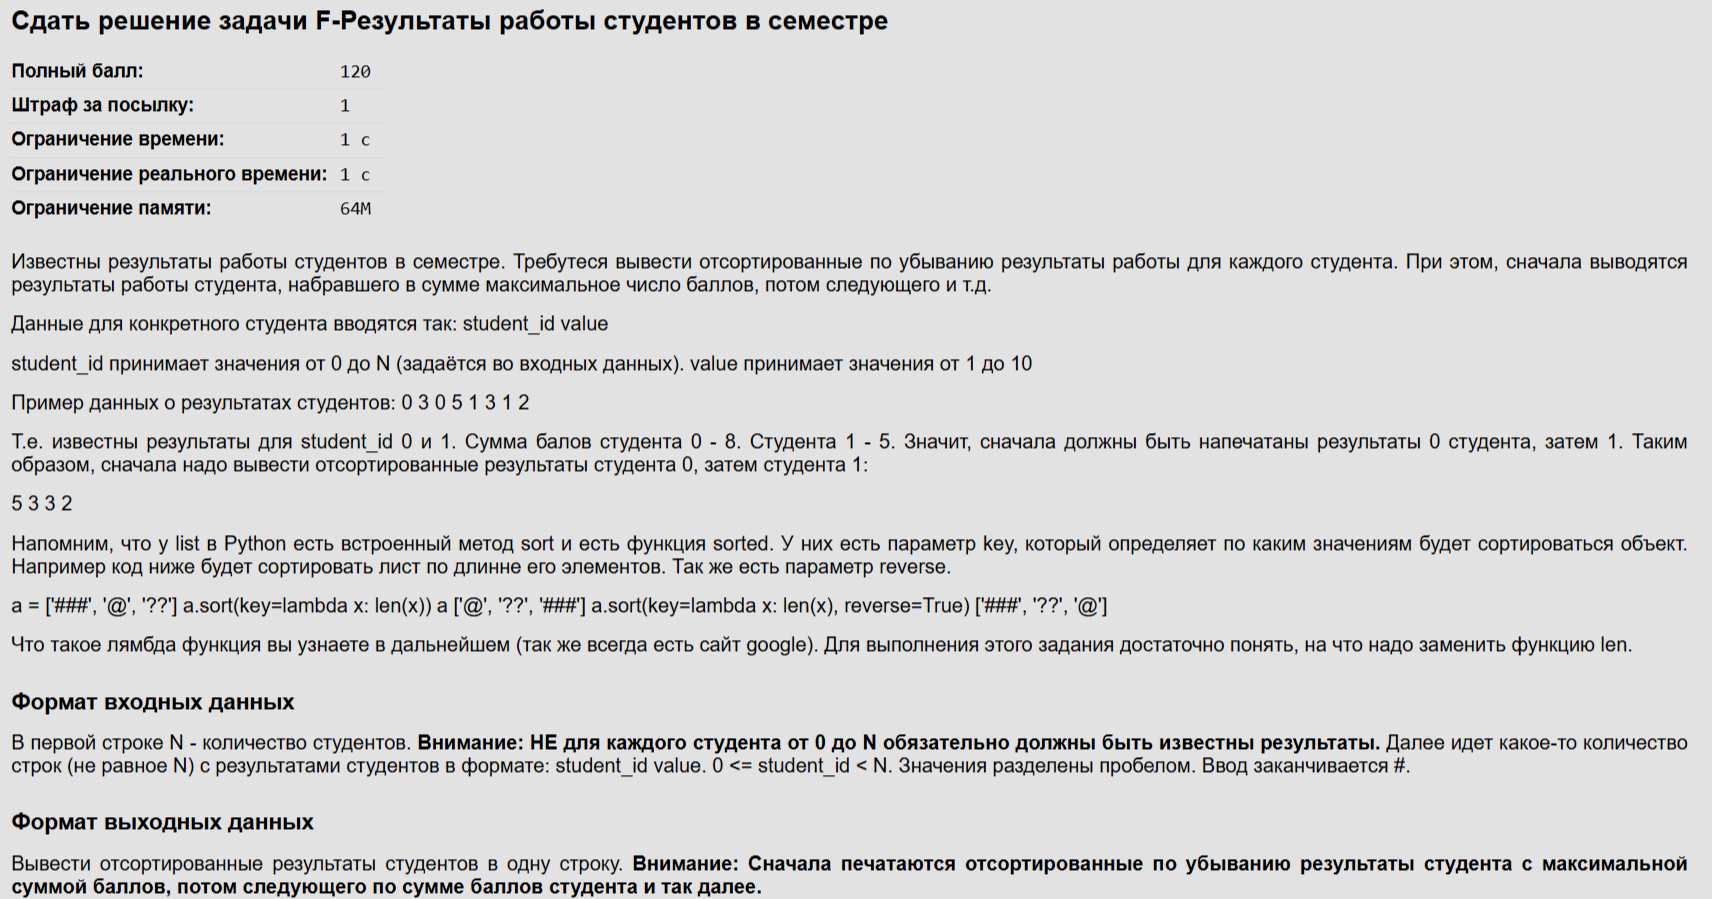

In [ ]:
n_students = int(input())
students = []
scores = []

while True:
  line = input()
  if line == '#':
    break

  row = line.split()
  if len(row) >= 2:
    students.append(row[0])
    scores.append(int(row[1]))




all_sums = []
grouped_scores = []
unique_students = []
for i in range (len(students)):
  if students[i] not in unique_students:
    unique_students.append(students[i])
    current_student_scores = []
    current_student_sum = 0
    for j in range (len(students)):
      if students[i] == students[j]:
        current_student_scores.append(scores[j])
        current_student_sum += scores[j]
    all_sums.append(current_student_sum)

    current_student_scores.sort(reverse=True)
    grouped_scores.append(current_student_scores)


for i in range(len(all_sums)-1):
  max_index = i
  for j in range(i+1, len(all_sums)):
    if all_sums[j] > all_sums[max_index]:
      max_index = j
  all_sums[i], all_sums[max_index] = all_sums[max_index], all_sums[i]
  grouped_scores[i], grouped_scores[max_index] = grouped_scores[max_index], grouped_scores[i]



final_result = []
for i in grouped_scores:
  for j in i:
    final_result.append(j)

print(*final_result)

In [35]:
n_students = int(input())
grouped_scores = [[] for _ in range(n_students)]

while True:
  line = input()
  if line == '#':
    break

  row = line.split()
  if len(row) >= 2:
    student = int(row[0])
    score = int(row[1])
    grouped_scores[student].append(score)

for student in range(n_students):
  grouped_scores[student].sort(reverse=True)



for i in range(n_students-1):
  max_index = i
  for j in range(i+1, n_students):
    if sum(grouped_scores[j]) > sum(grouped_scores[max_index]):
      max_index = j
  grouped_scores[i], grouped_scores[max_index] = grouped_scores[max_index], grouped_scores[i]

#students = sorted(students, key = lambda x: sum(x), reverse = True)

final_result = []
for i in grouped_scores:
  for j in i:
    final_result.append(j)

print(*final_result)


3
0 10
0 12
2 5
2 4
2 3
#
12 10 5 4 3


# G - Похожие массивы
Два массива называются похожими, если совпадают множества чисел, встречающихся в этих массивах. Требуется написать программу, которая определит, похожи ли два заданных массива.

Примечание: встроенные сортировки и set использовать запрещено!

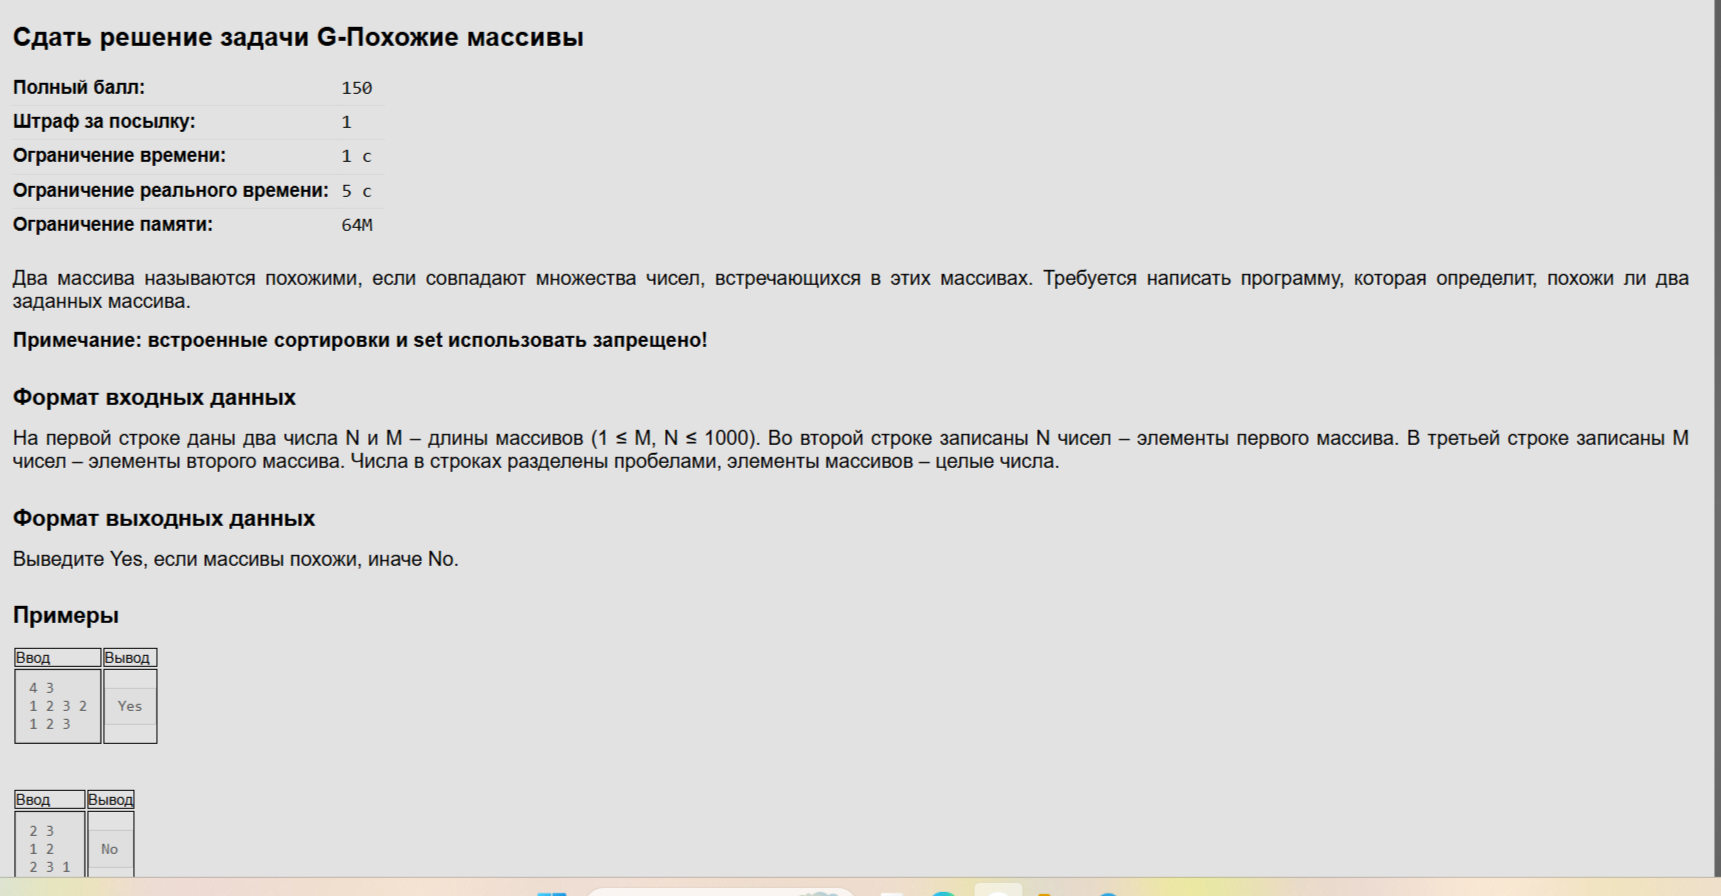

In [41]:
size1, size2 = map(int, input().split())
arr1 = list(map(int, input().split()))
arr2 = list(map(int, input().split()))

grouped_arr = [[] for _ in range(2)]
grouped_arr[0] = arr1
grouped_arr[1] = arr2

arr1_unique = []
arr2_unique = []
for i in range(size1):
  if arr1[i] not in arr1_unique:
    arr1_unique.append(arr1[i])
for j in range(size2):
  if arr2[j] not in arr2_unique:
    arr2_unique.append(arr2[j])

same = 0
for i in range(len(arr1_unique)):
  for j in range(len(arr2_unique)):
      if arr1_unique[i] == arr2_unique[j]:
        same += 1

if same == len(arr1_unique) and len(arr1_unique) == len(arr2_unique):
    print('Yes')
else:
    print('No')



4 3
1 2 3 2
1 2 3
Yes


# H - TopCoder
На соревновании по программированию участникам предлагаются три задачи, каждая из которых оценивается в некоторое количество баллов. В зависимости от того, насколько долго участник решал задачу, количество полученных им за неё баллов уменьшается. Как и в большинстве других соревнований, выигрывает участник, набравший наибольшее число баллов. Участники, набравшие одинаковое число баллов, считаются выступившими одинаково и в таблице они стоят в лексикографическом порядке. Из-за некоторых особенностей этих соревнований для предотвращения жульничества участники разделены в группы по 20 человек, называемые комнатами.

Ваша задача заключается в том, чтобы написать программу, которая по итоговым результатам в каждой комнате выводила бы суммарные итоговые результаты.

Примечение: python умеет сравнивать строки так, что если строка s лексиграфически меньше строки t, то выражение s < t вернет True ; встроенные сортировки использовать запрещено!

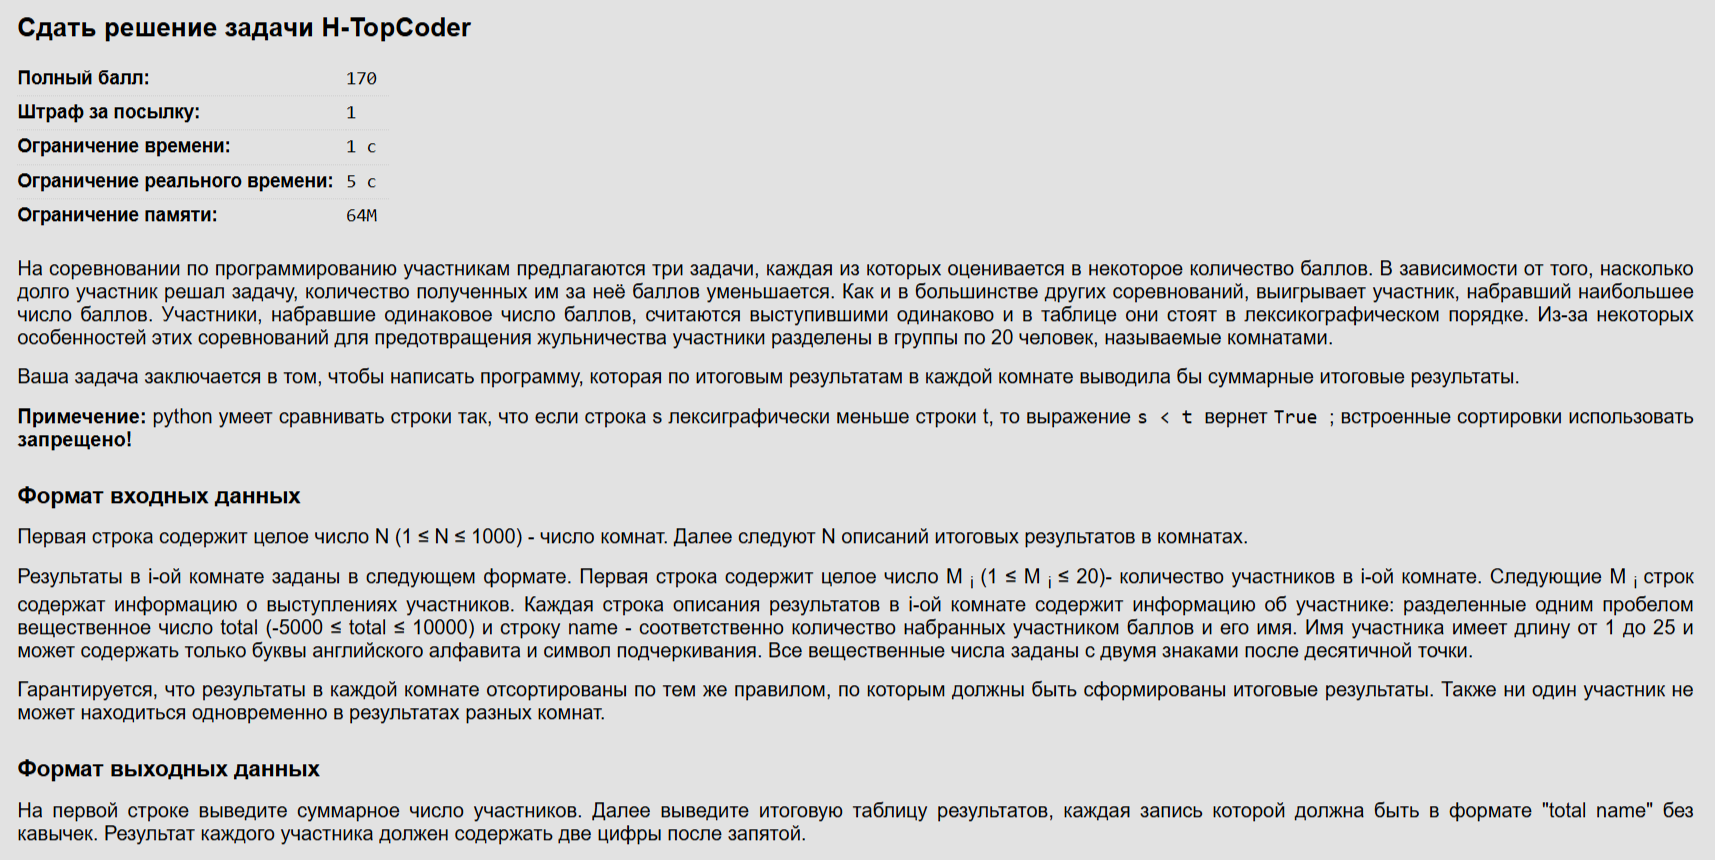

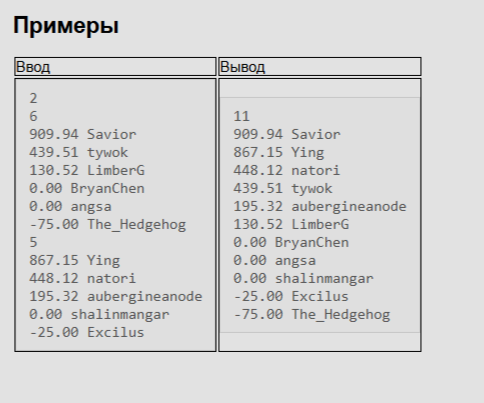

In [47]:
n_rooms = int(input())
scores = []
names = []
all_students = 0
for i in range(n_rooms):
  n_students = int(input())
  all_students += n_students
  for line in range(n_students):
    line = input()
    row = line.split()
    if len(row) == 2:
      scores.append(float(row[0]))
      names.append(str(row[1]))


for i in range(len(scores)-1):
  max_index = i
  for j in range(i+1, len(scores)):
    if scores[j] > scores[max_index] or (scores[j] == scores[max_index] and names[j] < names[max_index]):
      max_index = j
  scores[i], scores[max_index] = scores[max_index], scores[i]
  names[i], names[max_index] = names[max_index], names[i]

print(all_students)
for i in range(len(names)):
  print("{:.2f} {}".format(scores[i], names[i]))

#Пишет, что превышено максимальное время работы (больше 1 секунды), но другой код я писать не хочу, этот же нормальный. n^2 - время работы.


2
6
909.94 Savior
439.51 tywok
130.52 LimberG
0.00 BryanChen
0.00 angsa
-75.00 The_Hedgehog
5
867.15 Ying
448.12 natori
195.32 aubergineanode
0.00 shalinmangar
-25.00 Excilus
909.94 Savior
867.15 Ying
448.12 natori
439.51 tywok
195.32 aubergineanode
130.52 LimberG
0.0 BryanChen
0.0 angsa
0.0 shalinmangar
-25.0 Excilus
-75.0 The_Hedgehog


In [ ]:
n_rooms = int(input())
all_results = []  # Будем хранить тут кортежи (score, name)
all_students = 0

for i in range(n_rooms):
    n_students = int(input())
    all_students += n_students

    # Вместо того чтобы просто append-ить всё в конец,
    # мы будем сливать новую комнату с уже имеющимся списком
    current_room = []
    for line in range(n_students):
        row = input().split()
        if len(row) == 2:
            current_room.append((float(row[0]), row[1]))

    # --- Твой новый блок "умного" объединения (Merge) ---
    new_results = []
    i_idx, j_idx = 0, 0

    # Пока в обоих списках есть элементы, выбираем лучший
    while i_idx < len(all_results) and j_idx < len(current_room):
        score1, name1 = all_results[i_idx]
        score2, name2 = current_room[j_idx]

        # Сравниваем по твоим правилам: балл выше или (балл равен и имя меньше)
        if score1 > score2 or (score1 == score2 and name1 < name2):
            new_results.append(all_results[i_idx])
            i_idx += 1
        else:
            new_results.append(current_room[j_idx])
            j_idx += 1

    # Добавляем хвосты, если кто-то остался
    new_results.extend(all_results[i_idx:])
    new_results.extend(current_room[j_idx:])
    all_results = new_results
    # ----------------------------------------------------

# Твой блок вывода (немного поправлен под структуру списка)
print(all_students)
for score, name in all_results:
    print("{:.2f} {}".format(score, name))

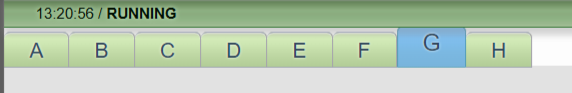